In [1]:
import pandas as pd
import numpy as np
from helpers import DIR_DATA


In [2]:
train_filename = DIR_DATA.joinpath("TRAIN.csv")
test_filename = DIR_DATA.joinpath("TEST_FINAL.csv")
train_data = pd.read_csv(train_filename)
test_data = pd.read_csv(test_filename)

In [3]:
def create_train_datasets(target_var = 'Sales', train_filename = None, test_filename = None , ID_cols = None):
    
    train_data = pd.read_csv(train_filename)
    test_data = pd.read_csv(test_filename)
    
    split_val = len(train_data)
    
    train_y = train_data[target_var]
    train_x = train_data.drop(target_var,1)
    
    test_x = test_data
    
    df_prepare = pd.concat([train_x,test_x]).reset_index(drop = True) 
    df_prepare.drop(ID_cols,1,inplace=True)
    
    return df_prepare , split_val , train_y

df , split_val , train_y = create_train_datasets(target_var = 'Sales'
                                       , train_filename = train_filename
                                       , test_filename = test_filename
                                       , ID_cols = 'ID')
df , split_val , train_y
    

(        Store_id Store_Type Location_Type Region_Code        Date  Holiday Discount  #Order
 0              1         S1            L3          R1  2018-01-01        1      Yes    9.00
 1            253         S4            L2          R1  2018-01-01        1      Yes   60.00
 2            252         S3            L2          R1  2018-01-01        1      Yes   42.00
 3            251         S2            L3          R1  2018-01-01        1      Yes   23.00
 4            250         S2            L3          R4  2018-01-01        1      Yes   62.00
 ...          ...        ...           ...         ...         ...      ...      ...     ...
 210600       186         S2            L5          R2  2019-07-31        0       No     NaN
 210601        11         S4            L2          R1  2019-07-31        0       No     NaN
 210602       185         S1            L1          R3  2019-07-31        0      Yes     NaN
 210603        69         S1            L1          R4  2019-07-31    

In [4]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()


Imported AutoViz_Class version: 0.0.84. Call using:
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 does not show plot but creates them and saves them in AutoViz_Plots directory in your local machine.


Shape of your Data Set loaded: (188340, 10)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  3
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  1
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    10 Predictors classified...
        This does not include the Target column(s)
        2 variables removed since they were ID or low-information variables


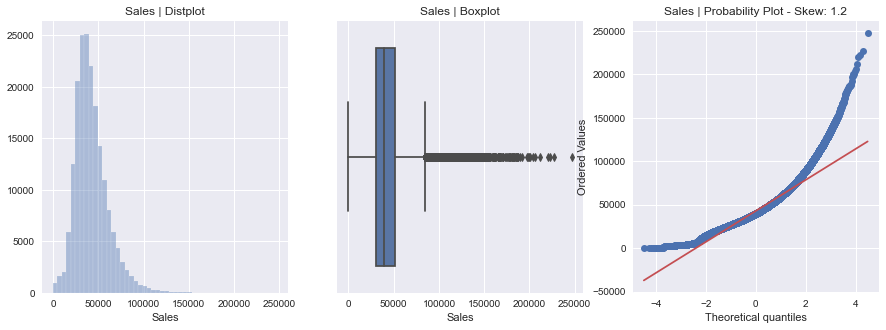

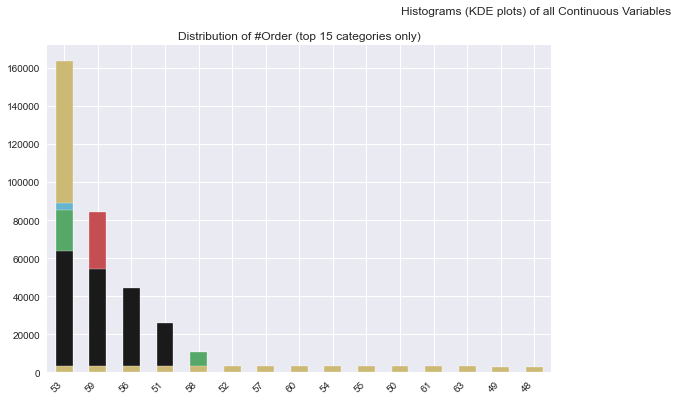

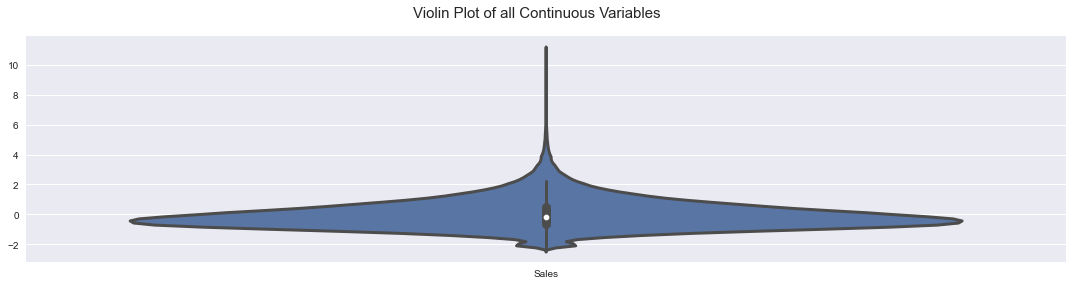

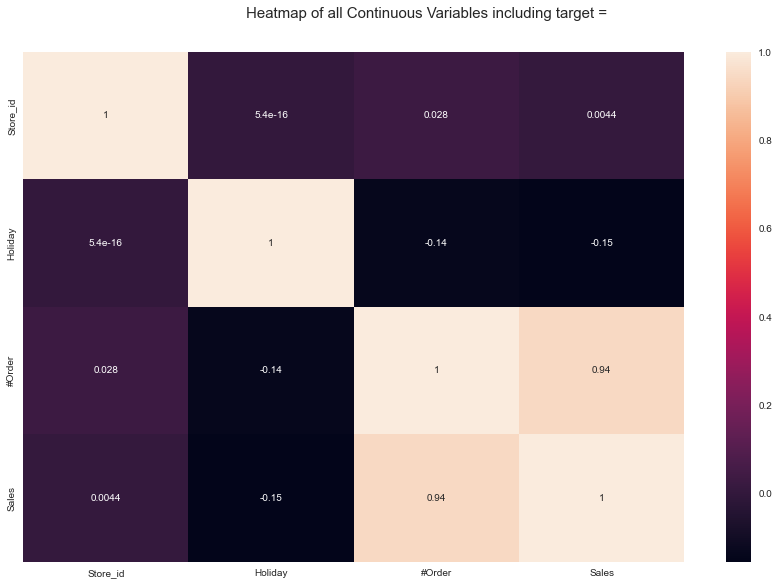

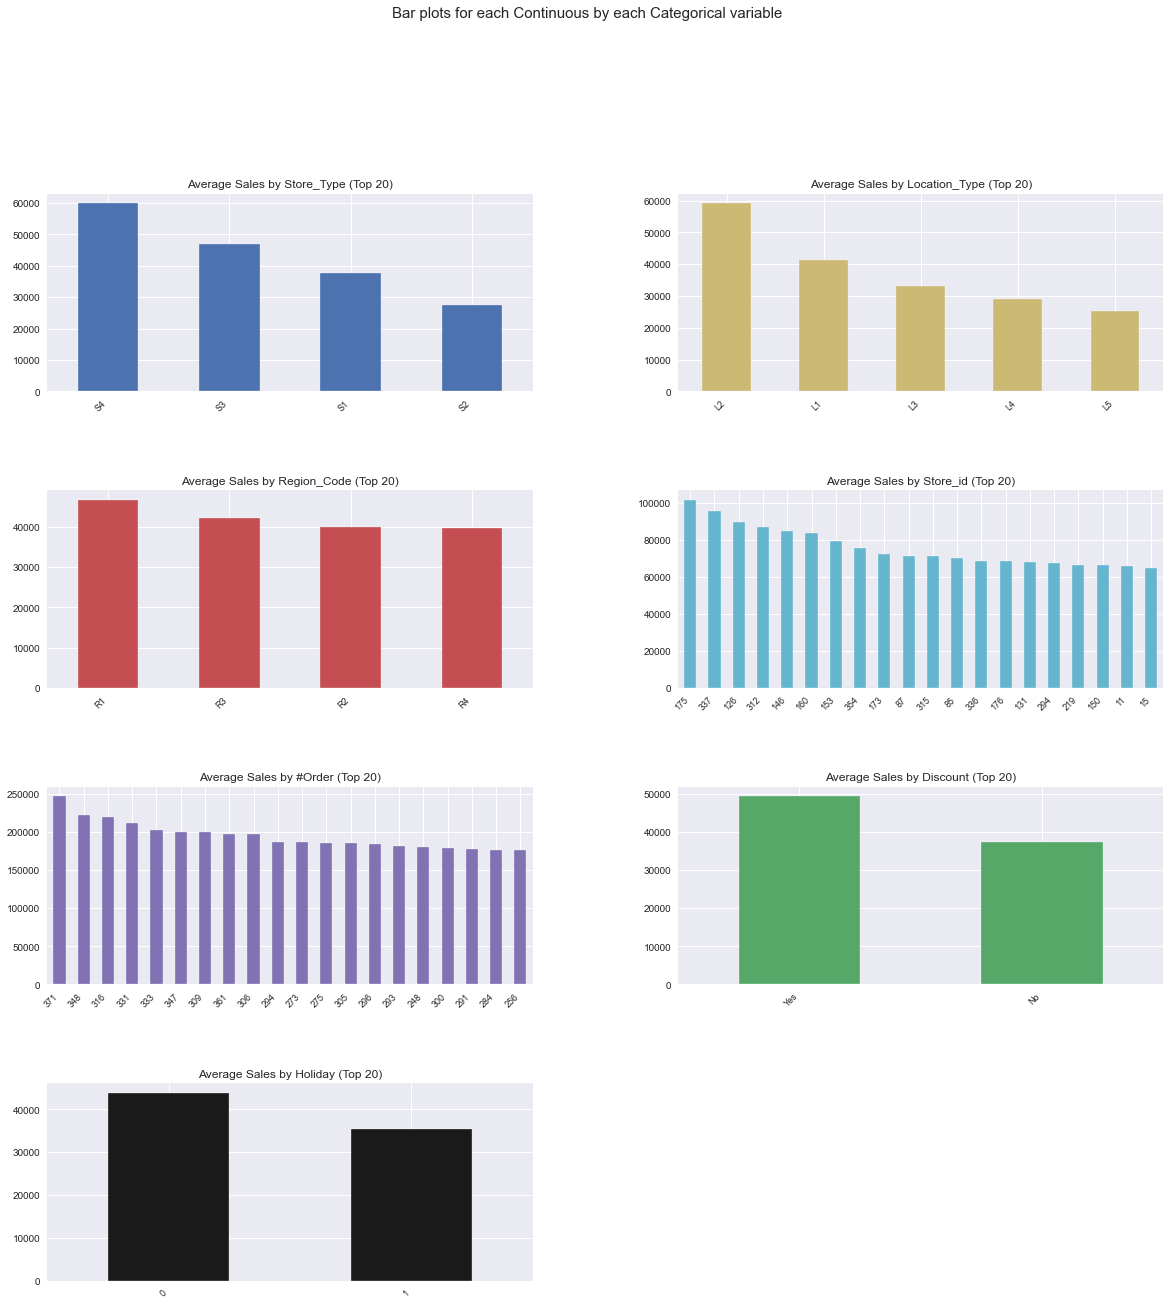

Time to run AutoViz (in seconds) = 4.972

 ###################### VISUALIZATION Completed ########################


In [5]:
# filename = train_filename
dft = AV.AutoViz(
    "",
    sep=",",
    depVar="",
    dfte=train_data,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=250000,
    max_cols_analyzed=30,
)

In [6]:
import sklearn
# train_data.columns
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
def OneHot(X_column, column_name):
    #Labe Encoding
    lbl = LabelEncoder() 
    lbl.fit(list(X_column.values)) 
    X_labelencoded = lbl.transform(list(X_column.values))
    #One Hot encoding
    onehot_encoded=pd.get_dummies(X_labelencoded, prefix=column_name)
    #onehot_encoder = OneHotEncoder(sparse=False)
    #onehot_encoded = onehot_encoder.fit_transform(X_labelencoded.reshape(-1,1))
    return onehot_encoded

In [8]:
def seperating_data(df):
    numeric_data = df.select_dtypes(include=[np.number])
    categorical_data = df.select_dtypes(exclude=[np.number])
    print(numeric_data.head())
    print(categorical_data.head())
    return numeric_data,categorical_data

def Normalize(X_skewed, skew_threshold = 2):
    if skew(X_skewed)>abs(skew_threshold):
        #X_Normalized, m = stats.boxcox(X_skewed)
        pt = PowerTransformer()
        X_Normalized=pt.fit_transform(X_skewed.values.reshape(-1,1))
        return X_Normalized
    else:
        return X_skewed
    
def numericorcategorical(dt):
    dt_columns=dt.columns
    for c in dt_columns:
        print(c)
        
        if dt[c].dtype == "datetime64[ns]":
            continue
        elif dt[c].dtype != "object":
            dt[c] = Normalize(dt[c],2)
        else:
            onehot_encoded = OneHot(dt[c], c)
            dt = dt.join(onehot_encoded)
            dt = dt.drop([c], axis=1)
    return dt


In [9]:
from scipy.stats import skew
from scipy import stats
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import PowerTransformer

In [10]:
df['month'] = pd.to_numeric(pd.DatetimeIndex(df['Date']).month)
df['year'] = pd.to_numeric(pd.DatetimeIndex(df['Date']).year)
df['week'] = pd.to_numeric(pd.DatetimeIndex(df['Date']).week)
df['day'] = pd.to_numeric(pd.DatetimeIndex(df['Date']).weekday)

df = df.drop('Date', 1 )
df

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,#Order,month,year,week,day
0,1,S1,L3,R1,1,Yes,9.00,1,2018,1,0
1,253,S4,L2,R1,1,Yes,60.00,1,2018,1,0
2,252,S3,L2,R1,1,Yes,42.00,1,2018,1,0
3,251,S2,L3,R1,1,Yes,23.00,1,2018,1,0
4,250,S2,L3,R4,1,Yes,62.00,1,2018,1,0
...,...,...,...,...,...,...,...,...,...,...,...
210600,186,S2,L5,R2,0,No,NaN,7,2019,31,2
210601,11,S4,L2,R1,0,No,NaN,7,2019,31,2
210602,185,S1,L1,R3,0,Yes,NaN,7,2019,31,2
210603,69,S1,L1,R4,0,No,NaN,7,2019,31,2


In [11]:
df_processed = numericorcategorical(df)
df_processed.drop('#Order',1,inplace = True)
df_processed

Store_id
Store_Type
Location_Type
Region_Code
Holiday
Discount
#Order
month
year
week
day


,Store_id,Holiday,month,year,week,day,Store_Type_0,Store_Type_1,Store_Type_2,Store_Type_3,Location_Type_0,Location_Type_1,Location_Type_2,Location_Type_3,Location_Type_4,Region_Code_0,Region_Code_1,Region_Code_2,Region_Code_3,Discount_0,Discount_1
0,1,2.69,1,2018,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1,253,2.69,1,2018,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,252,2.69,1,2018,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
3,251,2.69,1,2018,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
4,250,2.69,1,2018,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210600,186,-0.37,7,2019,31,2,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0
210601,11,-0.37,7,2019,31,2,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0
210602,185,-0.37,7,2019,31,2,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1
210603,69,-0.37,7,2019,31,2,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0


In [12]:
df_final = df_processed.copy()

In [13]:
len(df_final)
Train , Test = df_final.loc[:split_val-1,:] , df_final.loc[split_val:,:]
len(Train), len(Test) , split_val

(188340, 22265, 188340)

In [14]:
X = Train.loc[:,:].values
y = np.log(train_y.values)
y[np.isneginf(y)] = 0

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.1, random_state=42)

In [16]:
X_train, X_test, y_train, y_test

(array([[162.        ,  -0.37157376,  12.        , ...,   0.        ,
           1.        ,   0.        ],
        [ 26.        ,  -0.37157376,   6.        , ...,   0.        ,
           1.        ,   0.        ],
        [208.        ,  -0.37157376,   8.        , ...,   0.        ,
           1.        ,   0.        ],
        ...,
        [214.        ,  -0.37157376,  12.        , ...,   1.        ,
           0.        ,   1.        ],
        [362.        ,  -0.37157376,   2.        , ...,   0.        ,
           0.        ,   1.        ],
        [203.        ,  -0.37157376,  12.        , ...,   0.        ,
           1.        ,   0.        ]]),
 array([[287.        ,  -0.37157376,   1.        , ...,   0.        ,
           1.        ,   0.        ],
        [261.        ,   2.69125568,   3.        , ...,   0.        ,
           0.        ,   1.        ],
        [112.        ,  -0.37157376,   3.        , ...,   0.        ,
           0.        ,   1.        ],
        ...,


In [17]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [18]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [19]:
import numpy as np
# "Learn" the mean from the training data
median_train = np.median(y_train)
mean_train = np.mean(y_train)

# Get predictions on the test set
baseline_predictions_median = np.ones(y_test.shape) * median_train
baseline_predictions_mean = np.ones(y_test.shape) * mean_train

# Compute MAE
mae_baseline_medain = mean_squared_error(y_test, baseline_predictions_median)
print("Baseline MSE using medain val is {:.2f}".format(mae_baseline_medain))

# Compute MAE
mae_baseline_mean = mean_squared_error(y_test, baseline_predictions_mean)
print("Baseline MSE using mean val is {:.2f}".format(mae_baseline_mean))



Baseline MSE using medain val is 0.22
Baseline MSE using mean val is 0.21


In [20]:
params = {
    # Parameters that we are going to tune.
    'max_depth':9,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
}
params['eval_metric'] = "mae"
num_boost_round = 999

In [21]:
# model = xgb.train(
#     params,
#     dtrain,
#     num_boost_round=num_boost_round,
#     evals=[(dtest, "Test")],
#     early_stopping_rounds=10
# )
# print("Best MAE: {:.2f} with {} rounds".format(
#                  model.best_score,
#                  model.best_iteration+1))

In [22]:
model = xgb.XGBRegressor(
    learning_rate=0.1,
    n_estimators=200,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=10,
    nthread=4,
    objective='reg:squarederror'    
)

model.fit(X_train, y_train, 
          eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='rmse')

[0]	validation_0-rmse:9.07269	validation_1-rmse:9.07129
[1]	validation_0-rmse:8.16701	validation_1-rmse:8.16554
[2]	validation_0-rmse:7.35204	validation_1-rmse:7.35066
[3]	validation_0-rmse:6.61867	validation_1-rmse:6.61720
[4]	validation_0-rmse:5.95880	validation_1-rmse:5.95733
[5]	validation_0-rmse:5.36506	validation_1-rmse:5.36350
[6]	validation_0-rmse:4.83087	validation_1-rmse:4.82942
[7]	validation_0-rmse:4.35036	validation_1-rmse:4.34880
[8]	validation_0-rmse:3.91798	validation_1-rmse:3.91639
[9]	validation_0-rmse:3.52912	validation_1-rmse:3.52752
[10]	validation_0-rmse:3.17938	validation_1-rmse:3.17766
[11]	validation_0-rmse:2.86492	validation_1-rmse:2.86307
[12]	validation_0-rmse:2.58236	validation_1-rmse:2.58033
[13]	validation_0-rmse:2.32838	validation_1-rmse:2.32621
[14]	validation_0-rmse:2.10013	validation_1-rmse:2.09782
[15]	validation_0-rmse:1.89527	validation_1-rmse:1.89270
[16]	validation_0-rmse:1.71136	validation_1-rmse:1.70867
[17]	validation_0-rmse:1.54636	validation

[144]	validation_0-rmse:0.23581	validation_1-rmse:0.22366
[145]	validation_0-rmse:0.23572	validation_1-rmse:0.22353
[146]	validation_0-rmse:0.23559	validation_1-rmse:0.22345
[147]	validation_0-rmse:0.23552	validation_1-rmse:0.22337
[148]	validation_0-rmse:0.23544	validation_1-rmse:0.22329
[149]	validation_0-rmse:0.23535	validation_1-rmse:0.22322
[150]	validation_0-rmse:0.23532	validation_1-rmse:0.22319
[151]	validation_0-rmse:0.23520	validation_1-rmse:0.22307
[152]	validation_0-rmse:0.23517	validation_1-rmse:0.22303
[153]	validation_0-rmse:0.23497	validation_1-rmse:0.22280
[154]	validation_0-rmse:0.23491	validation_1-rmse:0.22274
[155]	validation_0-rmse:0.23481	validation_1-rmse:0.22263
[156]	validation_0-rmse:0.23477	validation_1-rmse:0.22259
[157]	validation_0-rmse:0.23468	validation_1-rmse:0.22248
[158]	validation_0-rmse:0.23462	validation_1-rmse:0.22240
[159]	validation_0-rmse:0.23448	validation_1-rmse:0.22223
[160]	validation_0-rmse:0.23435	validation_1-rmse:0.22210
[161]	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=0, reg_alpha=10, reg_lambda=1, scale_pos_weight=1,
             subsample=0.9, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [23]:
# import math
# predictions = model.predict(X_train)
np.min(y_test) , np.max(y_test)
# print("mean_squared_error : " + str(math.sqrt((mean_squared_error(predictions, y_train)))))

(0.0, 12.189573073137035)

In [24]:
X_TEST = Test.loc[:,:].values
predictions = np.exp(model.predict(X_TEST))
predictions

array([63488.97 , 41241.727, 78687.99 , ..., 42411.72 , 29912.686,
       26476.184], dtype=float32)

In [25]:
final_df =pd.DataFrame(data=[test_data['ID'],predictions] ).T
final_df.columns = ['ID','Sales']
final_df['Sales'] = final_df['Sales'].apply(lambda x:round(x))

DIR_PREDICTIONS = DIR_DATA.joinpath("PREDICTIONS")
pred_filename = DIR_PREDICTIONS.joinpath('baseline_result_v2.csv')

final_df.to_csv(pred_filename , index = False)

